# Model Evaluation & Hyperparameter Tuning

## Grid Search Using Python 

In this demo, you will learn how to apply GridSearch to find optimal hyperparameters.

## Problem Statement

Phishing websites are hard to detect and problematic when payments are included. These websites cause huge loss to both cusumers and business. Various features were captured from multiple sources aim is to classify them as __phishing, legitimate or suspicious__.

# Importing Libraries

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Data Analysis

In [2]:
data=pd.read_csv('PhishingData.csv')

In [3]:
data.head()

,id,SFH,popUpWidnow,SSLfinal_State,Request_URL,URL_of_Anchor,web_traffic,URL_Length,age_of_domain,having_IP_Address,Result
0,1,1,-1,1,-1,-1,1,1,1,0,0
1,2,-1,-1,-1,-1,-1,0,1,1,1,1
2,3,1,-1,0,0,-1,0,-1,1,0,1
3,4,1,0,1,-1,-1,0,1,1,0,0
4,5,-1,-1,1,-1,0,0,-1,1,0,1


<div style="background-color:##EDF9FF">
  <ul><li><h3> Testing For Null Values</h3></li></ul>
</div>

In [4]:
pd.DataFrame({'Count':data.isnull().sum(),'Percentage':data.isnull().sum()/data.shape[0]})

,Count,Percentage
id,0,0.0
SFH,0,0.0
popUpWidnow,0,0.0
SSLfinal_State,0,0.0
Request_URL,0,0.0
URL_of_Anchor,0,0.0
web_traffic,0,0.0
URL_Length,0,0.0
age_of_domain,0,0.0
having_IP_Address,0,0.0


<div style="background-color:##FBFFE3">
    <div style="float:left">
        <img src='https://drive.google.com/uc?export=download&id=1gpc8kbwaenTpaIvnO_MQR3vw12rKYQrJ', width=20,height=20,>
    </div>
    <span style="padding:20px;">Dataset has no null values.</span>
</div>

<div style="background-color:##EDF9FF">
  <ul><li><h3> Check Distribution Of Target Variable</h3></li></ul>
</div>

In [5]:
target_ratio=pd.DataFrame({'Counts':data.Result.value_counts(),'Percentage':data.Result.value_counts()/len(data)})
target_ratio


,Counts,Percentage
-1,702,0.518847
1,548,0.405026
0,103,0.076127


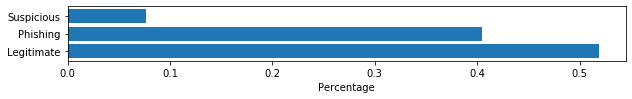

In [6]:
plt.figure(figsize = (10,1))
plt.barh(['Legitimate','Phishing','Suspicious'], target_ratio.Percentage)
plt.xlabel('Percentage')
plt.show()

<div style="background-color:##EDF9FF">
  <ul><li><h3>Selecting Features</h3></li></ul>
</div>

In [7]:
X=data.drop(['Result','id'],axis=1)
y=data.Result

# Grid Search 

Here are the parameters for <a href='https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV'>GridSearchCV</a>:
- __estimator__: `model`
- __param_grid__: `dist or list of dictionaries` Parameters to the estimator/model
- __scoring__: `string,callable, list/tuple, dict or None, default: None` Evaluating metrics
- __cv__: `int or callable` Cross validation

In [8]:
params = { "criterion" : ["gini", "entropy"], "n_estimators": [100, 150, 200,300]}
rf_gsv=GridSearchCV(estimator=RandomForestClassifier(),param_grid=params,cv=3,scoring='accuracy')
rf_gsv.fit(X,y)

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

<div style="background-color:##EDF9FF">
  <ul><li><h3>Results sorted by rank</h3></li></ul>
</div>

In [9]:
pd.DataFrame(rf_gsv.cv_results_).sort_values('rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
7,1.347545,0.326564,0.122494,0.040786,entropy,300,"{'criterion': 'entropy', 'n_estimators': 300}",0.882483,0.886918,0.922395,0.897265,0.017861,1
2,0.635143,0.110464,0.051949,0.003249,gini,200,"{'criterion': 'gini', 'n_estimators': 200}",0.886918,0.884701,0.920177,0.897265,0.016227,2
3,0.966720,0.167858,0.082547,0.006776,gini,300,"{'criterion': 'gini', 'n_estimators': 300}",0.886918,0.880266,0.920177,0.895787,0.017459,3
0,0.254329,0.013172,0.023966,0.000002,gini,100,"{'criterion': 'gini', 'n_estimators': 100}",0.884701,0.884701,0.913525,0.894309,0.013588,4
1,0.391497,0.009773,0.034623,0.001863,gini,150,"{'criterion': 'gini', 'n_estimators': 150}",0.886918,0.878049,0.915743,0.893570,0.016091,5
4,0.362183,0.030831,0.026631,0.006790,entropy,100,"{'criterion': 'entropy', 'n_estimators': 100}",0.886918,0.878049,0.913525,0.892831,0.015075,6
6,0.672447,0.078311,0.055916,0.005658,entropy,200,"{'criterion': 'entropy', 'n_estimators': 200}",0.875831,0.884701,0.917960,0.892831,0.018134,6
5,0.569917,0.054319,0.041277,0.001904,entropy,150,"{'criterion': 'entropy', 'n_estimators': 150}",0.884701,0.882483,0.911308,0.892831,0.013097,8


In [10]:
rf_gsv.best_params_

{'criterion': 'entropy', 'n_estimators': 300}

In [11]:
rf_gsv.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)